# 神奇宝贝数据分析

<ul>
<li><a href="#intro">一. 简介</a></li>
<li><a href="#wrangling">二. 数据整理</a></li>
<li><a href="#eda">三. 探索性数据分析</a></li>
<li><a href="#conclusions">四. 统计结论</a></li>
</ul>

<a id='intro'></a>
## 一. 简介

> **Pokemon数据集包含了从第一代至第七代的Pokemon的名字、属性、能力等信息  
本项目将通过Pokemon数据集探索一下几个问题：**  
1. 具有双属性Pokemon的比例
2. 最常见的Pokemon类别
3. Type1和Type2最常见的属性
4. 各代种族值最高的Pokemon
5. Pokemon性别比例
6. 传奇Pokemon的比例
7. Pokemon平均身高和体重
8. 生命值、攻击力、防御力、特殊攻击力和特殊防御力分别最高的Pokemon

> **Pokemon数据库字段描述**  
本数据集中包含 801 条Pokemon信息  

字段|描述|数据类型
-----:|-----:|------:  
pokedex  |  编号  |  int64
name  |  名字  |  object
japanese_name  |  日文名  |  object
classfication  |  类别  |  object
type1  |  属性1  |  object
type2  |  属性2  |  object
abilities  |  特性  |  object
percentage_male  |  性别比例（有多少几率为male） |   float64
height_m  |  身高（米）  |  float64
wight_kg  |  体重（公斤） |   float64
base_total  |  种族值  |  int64
hp  |  生命值  |  int64
attack  |  攻击力  |  int64
defense  |  防御力  |  int64
sp_attack  |  特殊攻击力  |  int64
ap_defense  |  特殊防御力  |  int64
speed  |  速度  |  int64
base_happiness  |  初始幸福度 |   int64
capture_rate  |  普通精灵球抓到的概率  |  int64
generation  |  第几代  |  int64
is_legendary  |  是否是传奇Pokemon  |  int64
base_egg_steps  |  孵化步数  |  int64
experience_growth |   100级所需经验值  |  int64
against_bug  |  属性相克-虫  |  float64
against_dark  |  属性相克-恶  |  float64
against_dragon  |  属性相克-龙  |  float64
against_electric  |  属性相克-电  |  float64
against_fairy  |  属性相克-精灵  |  float64
against_fight  |  属性相克-格斗  |  float64
against_fire  |  属性相克-火  |  float64
against_flying  |  属性相克-飞行  |  float64
against_ghost  |  属性相克-幽灵  |  float64
against_grass  |  属性相克-草  |  float64
against_ground  |  属性相克-地面  |  float64
against_ice  |  属性相克-冰  |  float64
against_normal  |  属性相克-普通  |  float64
against_poison  |  属性相克-毒  |  float64
against_psychic  |  属性相克-精神  |  float64
against_rock  |  属性相克-岩石  |  float64
against_steel  |  属性相克-刚  |  float64
against_water  |  属性相克-水  |  float64

<a id='wrangling'></a>
## 二. 数据整理

In [452]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 10000)

In [453]:
df = pd.read_csv('pokemon.csv', encoding='ISO-8859-1')

In [454]:
df.head()

,pokedex,name,japanese_name,classfication,type1,type2,abilities,percentage_male,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,base_happiness,capture_rate,generation,is_legendary,base_egg_steps,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,Fushigidaneéæå¡éåé,Seed Pokè mon,grass,poison,"['Overgrow', 'Chlorophyll']",88.1,0.7,6.9,318,45,49,49,65,65,45,70,45,1,0,5120,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,Fushigisouéæå¡éå¨é,Seed Pokè mon,grass,poison,"['Overgrow', 'Chlorophyll']",88.1,1.0,13.0,405,60,62,63,80,80,60,70,45,1,0,5120,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,Fushigibanaéæå¡éåé,Seed Pokè mon,grass,poison,"['Overgrow', 'Chlorophyll']",88.1,2.0,100.0,625,80,100,123,122,120,80,70,45,1,0,5120,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,Hitokageéæåéå,Lizard Pokè mon,fire,NaN,"['Blaze', 'Solar Power']",88.1,0.6,8.5,309,39,52,43,60,50,65,70,45,1,0,5120,1059860,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,Lizardoéå éç¬ºå,Flame Pokè mon,fire,NaN,"['Blaze', 'Solar Power']",88.1,1.1,19.0,405,58,64,58,80,65,80,70,45,1,0,5120,1059860,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


In [455]:
df.describe()

,pokedex,percentage_male,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,base_happiness,capture_rate,generation,is_legendary,base_egg_steps,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
count,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,8.010000e+02,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,401.000000,55.155761,1.155556,60.941199,428.377029,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,65.362047,98.675406,3.690387,0.087391,7191.011236,1.054996e+06,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365
std,231.373075,20.261623,1.069952,108.514597,119.203577,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,19.598948,76.248866,1.930420,0.282583,6558.220422,1.602558e+05,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562
min,1.000000,0.000000,0.100000,0.100000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,3.000000,1.000000,0.000000,1280.000000,6.000000e+05,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000
25%,201.000000,50.000000,0.600000,9.000000,320.000000,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,70.000000,45.000000,2.000000,0.000000,5120.000000,1.000000e+06,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000
50%,401.000000,50.000000,1.000000,27.300000,435.000000,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,70.000000,60.000000,4.000000,0.000000,5120.000000,1.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,601.000000,50.000000,1.500000,63.000000,505.000000,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,70.000000,170.000000,5.000000,0.000000,6400.000000,1.059860e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
max,801.000000,100.000000,14.500000,999.900000,780.000000,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,140.000000,255.000000,7.000000,1.000000,30720.000000,1.640000e+06,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
pokedex              801 non-null int64
name                 801 non-null object
japanese_name        801 non-null object
classfication        801 non-null object
type1                801 non-null object
type2                417 non-null object
abilities            801 non-null object
percentage_male      703 non-null float64
height_m             801 non-null float64
weight_kg            801 non-null float64
base_total           801 non-null int64
hp                   801 non-null int64
attack               801 non-null int64
defense              801 non-null int64
sp_attack            801 non-null int64
sp_defense           801 non-null int64
speed                801 non-null int64
base_happiness       801 non-null int64
capture_rate         801 non-null int64
generation           801 non-null int64
is_legendary         801 non-null int64
base_egg_steps       801 non-null int64
exp

有部分Pokemon只有一种属性，故type2具有较多的缺失值  
有部分Pokemon不具有性别，故percentage_male也具有部分缺失值

**删除 `japanese_name` 列**

In [457]:
df.drop('japanese_name', inplace=True, axis=1)

**删除 `classfication` 字段中的 Pokèmon**

In [458]:
df.classfication = df.classfication.map(lambda x: x[:-10])

**确认修改成功**

In [459]:
df.head()

,pokedex,name,classfication,type1,type2,abilities,percentage_male,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,base_happiness,capture_rate,generation,is_legendary,base_egg_steps,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,Seed,grass,poison,"['Overgrow', 'Chlorophyll']",88.1,0.7,6.9,318,45,49,49,65,65,45,70,45,1,0,5120,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,Seed,grass,poison,"['Overgrow', 'Chlorophyll']",88.1,1.0,13.0,405,60,62,63,80,80,60,70,45,1,0,5120,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,Seed,grass,poison,"['Overgrow', 'Chlorophyll']",88.1,2.0,100.0,625,80,100,123,122,120,80,70,45,1,0,5120,1059860,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,Lizard,fire,NaN,"['Blaze', 'Solar Power']",88.1,0.6,8.5,309,39,52,43,60,50,65,70,45,1,0,5120,1059860,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,Flame,fire,NaN,"['Blaze', 'Solar Power']",88.1,1.1,19.0,405,58,64,58,80,65,80,70,45,1,0,5120,1059860,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


<a id='eda'></a>
## 三. 探索性数据分析

### 1. 具有双属性Pokemon的比例

In [460]:
df.type2.count() / df.shape[0]

0.5205992509363296

有超过一半的Pokemon具有双属性

### 2. 最常见的Pokemon类别

In [461]:
most_fre_class = df.classfication.value_counts()[:10]

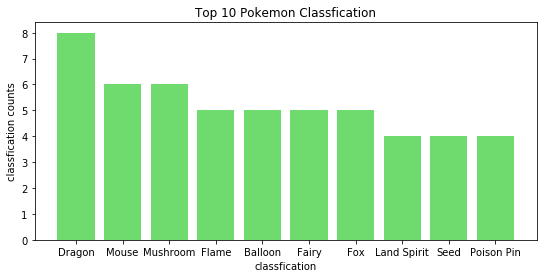

In [462]:
# 开始绘制图形
fig, ax = plt.subplots(figsize=(9,4))

# 绘制bar chart
ax.bar(most_fre_class.index, most_fre_class, color='limegreen', alpha=0.7)

# 设置标题
ax.set_title('Top 10 Pokemon Classfication')

# 设置 x轴 标签
ax.set_xlabel('classfication')

# 设置 y轴 标签
ax.set_ylabel('classfication counts')

plt.show()

右上图可知，最常见的类别是龙、鼠和蘑菇类

### 3. Type1和Type2最常见的属性

In [463]:
most_fre_1 = df.type1.value_counts()
most_fre_2 = df.type2.value_counts()

### 4. 各代种族值最高的Pokemon

In [464]:
top_base_df = pd.DataFrame(columns=df.columns)
for i in range(7):
    top_base_df.loc[i] = df.iloc[df[df['generation'] == i+1].base_total.idxmax()]

In [491]:
top_base_df

,pokedex,name,classfication,type1,type2,abilities,percentage_male,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,base_happiness,capture_rate,generation,is_legendary,base_egg_steps,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,150,Mewtwo,Genetic,psychic,NaN,"['Pressure', 'Unnerve']",NaN,2.0,122.0,780,106,150,70,194,120,140,0,3,1,1,30720,1250000,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0
1,248,Tyranitar,Armor,rock,dark,"['Sand Stream', 'Unnerve']",50.0,2.0,202.0,700,100,164,150,95,120,71,35,45,2,0,10240,1250000,2.0,0.5,1.0,1.0,2.0,4.0,0.5,0.5,0.5,2.00,2.0,1.0,0.5,0.5,0.00,1.0,2.0,2.0
2,384,Rayquaza,Sky High,dragon,flying,['Air Lock'],NaN,7.0,206.5,780,105,180,100,180,100,115,0,45,3,1,30720,1250000,0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.25,0.0,4.0,1.0,1.0,1.00,2.0,1.0,0.5
3,493,Arceus,Alpha,normal,NaN,['Multitype'],NaN,3.2,320.0,720,120,120,120,120,120,120,0,3,4,1,30720,1250000,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
4,646,Kyurem,Boundary,dragon,ice,"['Pressure', 'Teravolt', 'Turboblaze']",NaN,3.0,325.0,700,125,120,90,170,100,95,0,3,5,1,30720,1250000,1.0,1.0,2.0,0.5,2.0,2.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.00,2.0,2.0,0.5
5,718,Zygarde,Order,dragon,ground,"['Aura Break', 'Power Construct']",NaN,5.0,284.6,708,216,100,121,91,95,85,0,3,6,1,30720,1250000,1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,1.00,1.0,4.0,1.0,0.5,1.00,0.5,1.0,1.0
6,791,Solgaleo,Sunne,psychic,steel,['Full Metal Body'],NaN,3.4,230.0,680,137,137,107,113,89,97,0,45,7,1,30720,1250000,1.0,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,0.50,2.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0


### 5. Pokemon性别比例

In [466]:
df.percentage_male.count() / df.shape[0]

0.8776529338327091

有87%的Pokemon是公的

### 6.传奇Pokemon的比例

In [503]:
legend = []

for i in range(7):
    legend.append(df[(df['generation'] == i+1) & (df['is_legendary'] == 1)].shape[0] / df[df['generation'] == i+1].shape[0])

In [504]:
legend

[0.033112582781456956,
 0.06,
 0.07407407407407407,
 0.12149532710280374,
 0.08333333333333333,
 0.08333333333333333,
 0.2125]

### 7. Pokemon平均身高和体重

In [470]:
mean_height = []
mean_weight = []

for i in range(7):
    mean_height.append(df[df['generation'] == i+1].height_m.mean())
    mean_weight.append(df[df['generation'] == i+1].weight_kg.mean())

In [482]:
heights = pd.DataFrame({'height_m': mean_height})

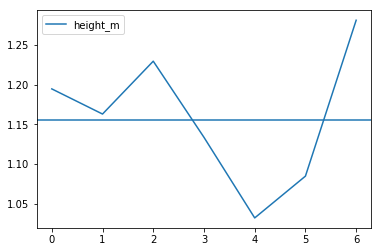

In [487]:
heights.plot(kind='line')
plt.axhline(df.height_m.mean());

In [489]:
weights = pd.DataFrame({'weight_kg': mean_weight})

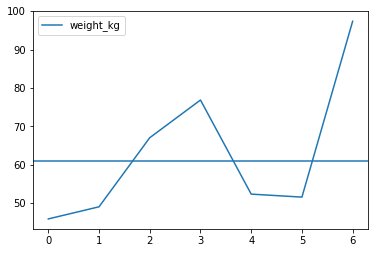

In [490]:
weights.plot(kind='line')
plt.axhline(df.weight_kg.mean());

### 8. 生命值、攻击力、防御力、特殊攻击力和特殊防御力分别最高的Pokemon

In [525]:
df.iloc[df.hp.idxmax()]['name']

'Blissey'

In [526]:
df.iloc[df.attack.idxmax()]['name']

'Heracross'

In [527]:
df.iloc[df.defense.idxmax()]['name']

'Steelix'

In [528]:
df.iloc[df.sp_attack.idxmax()]['name']

'Mewtwo'

In [531]:
df.iloc[df.sp_defense.idxmax()]

pokedex                                             213
name                                            Shuckle
classfication                                      Mold
type1                                               bug
type2                                              rock
abilities            ['Sturdy', 'Gluttony', 'Contrary']
percentage_male                                      50
height_m                                            0.6
weight_kg                                          20.5
base_total                                          505
hp                                                   20
attack                                               10
defense                                             230
sp_attack                                            10
sp_defense                                          230
speed                                                 5
base_happiness                                       70
capture_rate                                    

<a id='conclusions'></a>
## 四. 统计结论